# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `assets/Employee_Movie_Choices.txt`.

A second file, `assets/Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    #%matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, width=weights);
    else:
        nx.draw_networkx(G, pos,);

### Question 1

Using NetworkX, load in the bipartite graph from `assets/Employee_Movie_Choices.txt` and return that graph.

*This function should return a bipartite networkx graph with 19 nodes and 24 edges*

In [4]:
import networkx as nx
import pandas as pd

def answer_one():
    # Leer el archivo Employee_Movie_Choices.txt
    movie_choices_df = pd.read_csv('assets/Employee_Movie_Choices.txt', delimiter='\t')
    
    # Crear un grafo bipartito
    B = nx.Graph()
    
    # Añadir los nodos de los empleados (grupo 0)
    employees = set(movie_choices_df['#Employee'])  # Corregido a #Employee
    B.add_nodes_from(employees, bipartite=0)
    
    # Añadir los nodos de las películas (grupo 1)
    movies = set(movie_choices_df['Movie'])
    B.add_nodes_from(movies, bipartite=1)
    
    # Añadir las aristas entre empleados y sus elecciones de películas
    for index, row in movie_choices_df.iterrows():
        employee = row['#Employee']  # Corregido a #Employee
        movie = row['Movie']
        B.add_edge(employee, movie)
    
    return B

# Llamada a la función para verificar el grafo
graph = answer_one()
print(f"Número de nodos: {graph.number_of_nodes()}")
print(f"Número de aristas: {graph.number_of_edges()}")

Número de nodos: 19
Número de aristas: 24


In [5]:
assert type(answer_one()) == nx.Graph , "Your return type should be a Graph object"



### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a bipartite networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [6]:
def answer_two():
    # Obtener el grafo bipartito de la pregunta 1
    B = answer_one()
    
    # Añadir atributos 'type' a los nodos
    # Empleados tendrán el atributo {'type': 'employee'}
    for node in B.nodes():
        if node in employees:
            B.nodes[node]['type'] = 'employee'
        else:
            B.nodes[node]['type'] = 'movie'
    
    return B

# Llamada a la función para verificar los atributos
graph_with_attributes = answer_two()

# Imprimir algunos nodos y sus atributos para verificar
for node, data in graph_with_attributes.nodes(data=True):
    print(f"{node}: {data}")

Claude: {'bipartite': 0, 'type': 'employee'}
Vincent: {'bipartite': 0, 'type': 'employee'}
Joan: {'bipartite': 0, 'type': 'employee'}
Georgia: {'bipartite': 0, 'type': 'employee'}
Frida: {'bipartite': 0, 'type': 'employee'}
Lee: {'bipartite': 0, 'type': 'employee'}
Pablo: {'bipartite': 0, 'type': 'employee'}
Andy: {'bipartite': 0, 'type': 'employee'}
Kung Fu Panda: {'bipartite': 1, 'type': 'movie'}
Mean Girls: {'bipartite': 1, 'type': 'movie'}
The Matrix: {'bipartite': 1, 'type': 'movie'}
Snakes on a Plane: {'bipartite': 1, 'type': 'movie'}
The Shawshank Redemption: {'bipartite': 1, 'type': 'movie'}
The Dark Knight: {'bipartite': 1, 'type': 'movie'}
The Godfather: {'bipartite': 1, 'type': 'movie'}
Anaconda: {'bipartite': 1, 'type': 'movie'}
The Social Network: {'bipartite': 1, 'type': 'movie'}
Forrest Gump: {'bipartite': 1, 'type': 'movie'}
Monty Python and the Holy Grail: {'bipartite': 1, 'type': 'movie'}


In [7]:
assert type(answer_two()) == nx.Graph , "Your return type should be a Graph object"


### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

In [9]:
import networkx as nx
from networkx.algorithms import bipartite

def answer_three():
    # Obtener el grafo bipartito con los atributos
    B = answer_two()
    
    # Obtener el conjunto de empleados
    employees = {n for n, d in B.nodes(data=True) if d['type'] == 'employee'}
    
    # Crear la proyección ponderada de los empleados
    weighted_proj = bipartite.weighted_projected_graph(B, employees)
    
    return weighted_proj

# Llamada a la función para verificar la proyección ponderada
projected_graph = answer_three()

# Imprimir los bordes y sus pesos para verificar
for u, v, data in projected_graph.edges(data=True):
    print(f"{u} - {v}: {data['weight']}")

Claude - Georgia: 3
Claude - Andy: 1
Vincent - Frida: 2
Vincent - Pablo: 1
Joan - Lee: 3
Joan - Andy: 1
Georgia - Andy: 1
Frida - Pablo: 2
Frida - Andy: 1
Lee - Andy: 1
Pablo - Andy: 1


EdgeDataView([('Claude', 'Georgia', {'weight': 3}), ('Claude', 'Andy', {'weight': 1}), ('Vincent', 'Frida', {'weight': 2}), ('Vincent', 'Pablo', {'weight': 1}), ('Joan', 'Lee', {'weight': 3}), ('Joan', 'Andy', {'weight': 1}), ('Georgia', 'Andy', {'weight': 1}), ('Frida', 'Pablo', {'weight': 2}), ('Frida', 'Andy', {'weight': 1}), ('Lee', 'Andy', {'weight': 1}), ('Pablo', 'Andy', {'weight': 1})])

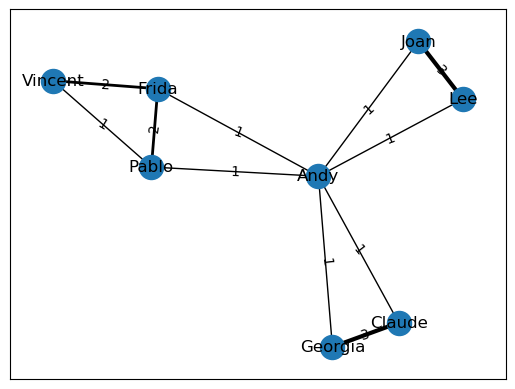

In [10]:
G = answer_three()
plot_graph(G, weight_name="weight")
G.edges(data = True)

In [11]:
assert type(answer_three()) == nx.Graph , "Your return type should be a Graph object"


### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the pearson correlation between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
def answer_four():
    # Obtener el grafo proyectado ponderado de empleados
    projected_graph = answer_three()
    
    # Leer el archivo de relaciones entre empleados sin encabezados
    relationships_df = pd.read_csv('assets/Employee_Relationships.txt', delimiter='\t', header=None)
    
    # Asignar manualmente los nombres de las columnas
    relationships_df.columns = ['Employee1', 'Employee2', 'Relationship']
    
    # Listas para almacenar los valores de comparación
    common_movies = []
    relationship_scores = []
    
    # Iterar sobre el DataFrame de relaciones para obtener los pares de empleados y sus puntuaciones
    for index, row in relationships_df.iterrows():
        employee1 = row['Employee1']
        employee2 = row['Employee2']
        relationship_score = row['Relationship']
        
        # Verificar si hay una arista en el grafo proyectado (número de películas en común)
        if projected_graph.has_edge(employee1, employee2):
            common_movies.append(projected_graph[employee1][employee2]['weight'])
        else:
            # Si no hay una arista, significa que tienen 0 películas en común
            common_movies.append(0)
        
        # Añadir la puntuación de relación correspondiente
        relationship_scores.append(relationship_score)
    
    # Calcular la correlación de Pearson
    correlation, _ = pearsonr(common_movies, relationship_scores)
    
    return correlation

# Llamada a la función para verificar la correlación
correlation_value = answer_four()
print(f"Correlación de Pearson: {correlation_value}")

Correlación de Pearson: 0.7883962221733475


In [16]:
ans_four = answer_four()